## 作業

設計錢包總金額為 1000 元，

如果購買商品總金額超過 1000 

會引發一個金額不足的例外 OverflowError 

In [2]:
sum = 0
dic1 = {}
while True:
    item = input("消費項目")
    price = input("消費金額")
    try:
        if sum + int(price)  > 1000:
            raise OverflowError
        dic1[item] =   price    
        sum +=  int(price)
    except OverflowError:
        print("已經超支")
        break
print(dic1)        

消費項目 AA
消費金額 100
消費項目 BB
消費金額 200
消費項目 CC
消費金額 300
消費項目 DD
消費金額 500


已經超支
{'AA': '100', 'BB': '200', 'CC': '300'}


## 目錄管理

我們可以使用 os 模組的 getcwd() 方法獲取當前工作目錄。

此方法以字串形式返回當前工作目錄。 

請動手操作，並留意輸出結果


In [3]:
import os
print(os.getcwd())

C:\Users\xvpow\ai_python_20250727\ch5


In [4]:
from os import listdir
files = listdir()
for f in files:
    print(f)

.ipynb_checkpoints
data.json
data.txt
data0.json
data1.txt
example.csv
example1.csv
example2.csv
json與csv用檔案.zip
result-readline.txt
score.json
score.txt
ttest.csv
Untitled.ipynb


## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|

In [8]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
print(text,file=open("data.txt","w",encoding="utf-8"))

In [9]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
file = open("data2.txt","w",encoding="utf-8")
file.write(text)
file.close()

In [11]:
text = """
HELLO!
"""
file = open("data2.txt","a",encoding="utf-8")
file.write(text)
file.close()

UnsupportedOperation: not writable

In [14]:
f = open("data.txt","r",encoding="utf-8")
content = f.read()
print(content)
f.close()

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。




## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料

In [25]:
import csv
f = open("example1.csv","r")
for row in csv.reader(f):
    if float(row[5]) > 100:
        print(row[0],row[1],row[2])
f.close()        

 104/01/03 2,640,781,030 64,138,886,194
 104/01/17 3,720,277,205 101,133,309,290
 104/01/30 4,540,373,544 143,900,658,474
 104/01/31 5,486,734,180 162,361,181,834


In [27]:
import csv
f = open("example.csv","r",encoding="utf-8")
for row in csv.DictReader(f):
    if float(row["漲跌點數"]) > 9.34:
        print(row["日期"],row["漲跌點數"])
f.close()

 104/01/03 101.17
 104/01/04 29.59
 104/01/05 47.89
 104/01/10 85.83
 104/01/17 117.46
 104/01/18 12.61
 104/01/30 173.72
 104/01/31 109.67


## Json
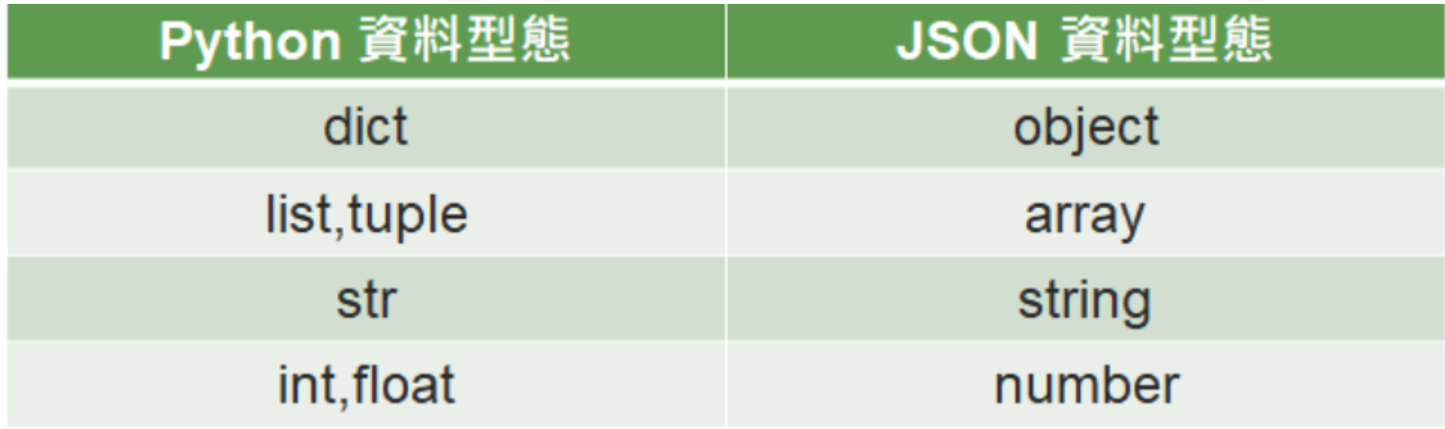
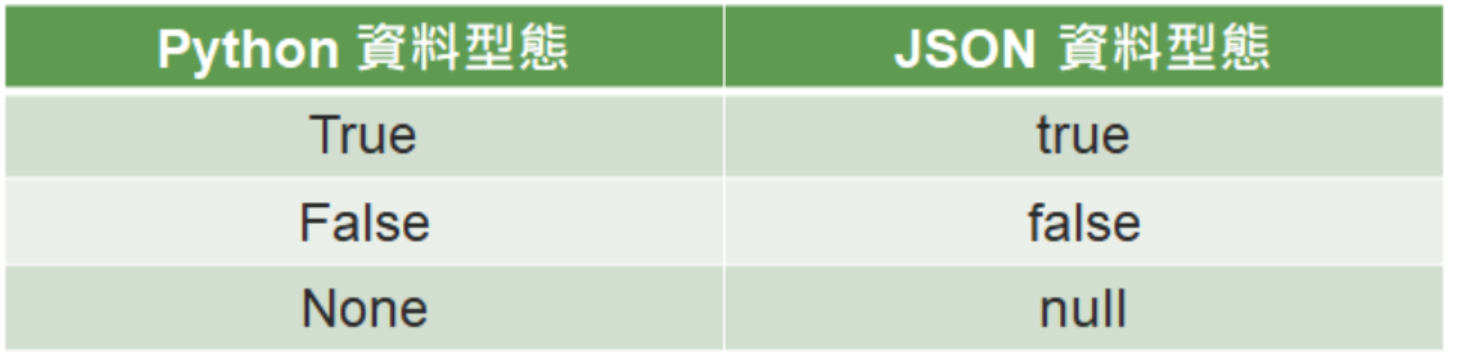
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [30]:
import json
json1 = {'python':"課程","gjun":100,"python-class":True,"Line":None}
print(json1)
jsonStr = json.dumps(json1,ensure_ascii=False)
print(jsonStr)

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
{"python": "課程", "gjun": 100, "python-class": true, "Line": null}


In [31]:
import json
json2 = {'python':"課程","gjun":100,"python-class":True,"Line":None}
with open("data0.json","w",encoding="utf-8") as outfile:
    json.dump(json2,outfile,ensure_ascii=False)
    

In [35]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
with open("data3.json","w",encoding="utf-8") as outfile:
    json.dump(data,outfile,ensure_ascii=False,indent=2) # 加入indent 可增加閱讀性

### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [38]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(json2["gjun"])
print(json2["python-class"])

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
100
True


In [40]:
import json
with open("data0.json","r",encoding="utf-8") as jsonFile:
    data = json.load(jsonFile)
    print(data)

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [43]:
import os
class TestFile:
    def openFile(self,filePath):
        self.handle = open(filePath,"w")
        self.handle.close()
t = TestFile()
t.openFile("text.txt")
os.remove("text.txt")
print("Success")

Success


## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [44]:
import os
class TestFile:
    def openFile(self,filePath):
        with open(filePath,"w") as f:
            f.write("Hello")
t = TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")
       

Success


## 爬蟲

pip install beautifulsoup4

pip install html5lib

In [13]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1">V1</a>
<a id='a2' class="c1">V2</a>
<a id='a3' class="c3">V3</a>
'''
soup = BeautifulSoup(html,"html5lib")
print(soup.find_all("a"))
print(soup.find(id="a1"))
print(soup.find_all("a",class_="c1"))

[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>, <a class="c3" id="a3">V3</a>]
<a class="c1" id="a1">V1</a>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]


In [25]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1 c5" href="https://google.com">Google</a>
<a id='a2' class="c1"  href="https://yahoo.com">Yahoo</a>
<a id='a3' class="c3" href="https://facebook.com">Facebook</a>'''
soup = BeautifulSoup(html,"html5lib")
tage = soup.find(id="a1")
print(type(tage))
print(tage.getText())
print(tage.get("href"))
print(tage.get("class"))
tmpList = soup.find_all("a",class_="c1")
for tag in tmpList:
    print(tag.get("href"),tag.getText())


<class 'bs4.element.Tag'>
Google
https://google.com
['c1', 'c5']
https://google.com Google
https://yahoo.com Yahoo


In [42]:
import requests
from bs4 import BeautifulSoup
url = "https://zh.wikipedia.org/zh-tw/2025年电影"
resp = requests.get(url)
resp.encoding="utf-8"
soup = BeautifulSoup(resp.text,"html5lib")
movieTable = soup.find("table",class_="wikitable sortable")
tbody = movieTable.find("tbody")
trList = tbody.find_all("tr")
for inx in range(1,len(trList)):
     print("排名:",trList[inx].find("th").text,end="")
     print("片名:",trList[inx].select_one("a").text)
     print("全球票房:",trList[inx].find_all("td")[-1].text)
    

排名: 1
片名: 哪吒之魔童鬧海
全球票房: $2,123,757,964[3][4]

排名: 2
片名: 星際寶貝：史迪奇
全球票房: $1,030,541,425

排名: 3
片名: MINECRAFT麥塊電影
全球票房: $955,149,195

排名: 4
片名: 侏羅紀世界：重生
全球票房: $830,700,810

排名: 5
片名: 馴龍高手
全球票房: $626,549,310

排名: 6
片名: 超人
全球票房: $600,900,181

排名: 7
片名: F1電影
全球票房: $598,503,240

排名: 8
片名: 不可能的任務：最終清算
全球票房: $597,568,852

排名: 9
片名: 唐探1900
全球票房: $495,792,456[3]

排名: 10
片名: 驚奇4超人：第一步
全球票房: $475,164,133



## Numpy簡介

In [44]:
import numpy as np
c1 = [1,3,5,7,9]
d1 = [3,5,6,7,9]
f1 = c1 + d1
print(f1)
c2 = np.array(c1)
d2 = np.array(d1)
f2 = c2 + d2
print(f2)


[1, 3, 5, 7, 9, 3, 5, 6, 7, 9]
[ 4  8 11 14 18]


+ ndarray.ndim
   + 維度的數量。
+ ndarray.shape
   + 顯示出陣列在每個維度上的整數值。
+ ndarray.size
   + 陣列內元素的總數。
+ ndarray.dtype
   + 用來描述陣列中元素類型的對象。

In [50]:
import numpy as np
i = [[1,2,3],
     [4,5,6]]#2x3
a = np.array(i,dtype=np.int16)
print(a.ndim)
print(a.shape)#軸 axis
print(a.size)
print(a.dtype)

2
(2, 3)
6
int16


In [59]:
import numpy as np
a = np.array([6,7,8,9])
b = np.arange(4)
print(a)
print(b)
print("="*10)
c = a - b
print(c)
print("="*10)
d = b ** 2
print(d)
f = np.array([5,-1,3,9,0])
print("="*10)
print(f <= 3)
print("="*10)
print(f[f <= 3])

[6 7 8 9]
[0 1 2 3]
[6 6 6 6]
[0 1 4 9]
[False  True  True False  True]
[-1  3  0]


In [63]:
import numpy as np
x = np.zeros((2,4))
print(x)
print("="*20)
x = np.ones((2,4))
print(x)
print("="*20)
x = np.full((2,4),8)
print(x)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[8 8 8 8]
 [8 8 8 8]]


In [65]:
import numpy as np
x = np.eye(3)
print(x)
x = np.diag([1,2,3,4])
print(x)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


### linspace arange

In [68]:
import numpy as np
x = np.linspace(1,10,6)# (10-1)/(6-1)
print(x)
x = np.linspace(1,10,100)
print(x)

[ 1.   2.8  4.6  6.4  8.2 10. ]
[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.2727272

In [79]:
import numpy as np
x = np.linspace(1,10,6)# (10-1)/(6-1)
print(x)
print(x.shape)
y = x.reshape((2,3))
print(y)
print(y.shape)

[ 1.   2.8  4.6  6.4  8.2 10. ]
(6,)
[[ 1.   2.8  4.6]
 [ 6.4  8.2 10. ]]
(2, 3)


In [80]:
import numpy as np
r1 = np.arange(25,30,0.5)
print(r1)

[25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5]


## 陣列指定位置取值
+ 間隔選取 [::c]
  + 以 1 維陣列來說明 x[a:b:c]
  + a：選取資料的起始索引
  + b：選取資料的結束索引 +1
  + c：選取資料間隔，以索引值可以被此值整除的元素，不指定表示 1
+ 倒序 [::-1]
  + 只是單純的把順序反過來

## 陣列指定位置-給予一個整數
+ 關於指定位置  [row,column]
+ 假設給予一個整數為 N
 + 如果是給固定的 N，那就代表 row 或 column 等於 N。
 + 如果是 N：，那就代表 row 或 column 大於等於 N 的區域。
 + 如果是：N，那就代表 row 或 column 小於 N 的區域。 
 + 如果是：，那就代表 row 或 column 是任意欄位。


In [86]:
import numpy as np
a = np.arange(1,10).reshape((3,3))
print(a)
print(a[0])
print(a[2][2])
print(a[2][1])
print(a[1][2])
print(a[1,2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
9
8
6
6


In [93]:
import numpy as np
a = np.arange(1,10).reshape((3,3))
print(a)
print(a[1,1:])
print("="*20)
print(a[1:,1:])
b = a[:2,:2]
print("="*20)
print(b)
b[0,1] = 99
print("="*20)
print(b)
print(a)
#a 與 b使用共同的資料

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[5 6]
[[5 6]
 [8 9]]
[[1 2]
 [4 5]]
[[ 1 99]
 [ 4  5]]
[[ 1 99  3]
 [ 4  5  6]
 [ 7  8  9]]


# 作業

## 幫我輸出以下內容
 13 14]]

In [97]:
import numpy as np
a=np.arange(0,36).reshape((6,6))
print(a)
'''
---1--
[3 4]
---2--
[[28 29]
 [34 35]]
---3--
[[ 0  1  2]
 [ 6  7  8]
 [12 13 14]]
'''

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]


'\n---1--\n[3 4]\n---2--\n[[28 29]\n [34 35]]\n---3--\n[[ 0  1  2]\n [ 6  7  8]\n [12 13 14]]\n'